# HIV MODEL
Timothy Novak

Modeling and Simulation

October 2018

This model recreates the HIV model described in the article Reduction of HIV Concentration During Acute Infection: Independience from a Specific Immune Response

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


The above code imports the modeling and simulation library and configures the jupyter notebook

## State
This code creates a structure which contains the curent state of the model. The model uses three main stocks: Uninfected cells are born and die naturally however they can also transition to latently or actively infected cells. Latently infected cells can either die by natural cell death or transition to actively infected cells. Actively infectecd cells can die, but they also produce more free virons. Free virons are created at a variable rate dependent on the number of active cells and they are removed by the immune system at a constant rate. Free virons also influence the rate of cells becoming infected cells.

In [2]:
#state variable  which innitializes the innitial 
st8 = State(uninfected = 1000, latently_infected = 0, actively_infected = 0, free_virons = 100)

,values
uninfected,1000
latently_infected,0
actively_infected,0
free_virons,100


## System
This code creates a structure which holds the model parameters such as natural propagation rates.

In [3]:
#makes a system which holds all the constant values
sys = System(Tt = .272, indp_death_r8 = 1.36*10**(-3), inft_r8 = .00027, prop_latent = .1, activ_r8 = 3.6*10**(-2), inf_death_r8 = .33,vir_rem_r8 = 2, vir_per_active = 100)

,values
Tt,0.27200
indp_death_r8,0.00136
inft_r8,0.00027
prop_latent,0.10000
activ_r8,0.03600
inf_death_r8,0.33000
vir_rem_r8,2.00000
vir_per_active,100.00000


## Update Function
This function updates the value of the state object by computing the new values based on the differential equations describing changes in the stocks. 

In [4]:
def upd8_func (st8,sys):
    """function which performs one update of an HIV model and returns the result
    it takes a system and a state as arguments"""
    #translating the diff eq's into code
    delta_uninif = sys.Tt - sys.indp_death_r8 * st8.uninfected - sys.inft_r8*st8.uninfected*st8.free_virons
    delta_latent = sys.prop_latent*sys.inft_r8*st8.uninfected*st8.free_virons - sys.indp_death_r8*st8.latently_infected - sys.activ_r8*st8.latently_infected
    delta_active = (1-sys.prop_latent)*sys.inft_r8*st8.uninfected*st8.free_virons + sys.activ_r8*st8.latently_infected - sys.inf_death_r8*st8.actively_infected
    delta_viron = sys.vir_per_active*st8.actively_infected - sys.vir_rem_r8 * st8.free_virons
    
    #update the state variables
    st8.uninfected += delta_uninif * sys.dt
    st8.latently_infected += delta_latent * sys.dt
    st8.actively_infected += delta_active * sys.dt
    st8.free_virons += delta_viron * sys.dt
    
    return State(uninfected = st8.uninfected, latently_infected = st8.latently_infected, actively_infected = st8.actively_infected,free_virons = st8.free_virons)

## Run Simulation
This code runs an entire simulation of the HIV model based on inital parameters and a number of time steps to simulate. The function returns a datastructure containing the states of the stocks through time.

In [5]:
def run_sim(init_uninif, init_lat,init_act,Init_vir, tot_time, upd8_func, dt):
    """A function which runs a simulation of an HIV model """
   #makes a system which holds all the constant values
    sys = System(Tt = .272, indp_death_r8 = 1.36*10**(-3), inft_r8 = .00027, prop_latent = .1, activ_r8 = 3.6*10**(-2), inf_death_r8 = .33,vir_rem_r8 = 2, vir_per_active = 100, dt = dt)
    #state variable  which innitializes the innitial 
    st8 = State(uninfected = init_uninif, latently_infected = init_lat, actively_infected = init_act, free_virons = Init_vir)
    
    results = TimeFrame(columns=st8.index)
    
    for t in range(tot_time):
        results.row[t] = upd8_func(st8,sys)
    return results


## Results
This code generates some graphs of the behaviors of the various stocks through time.

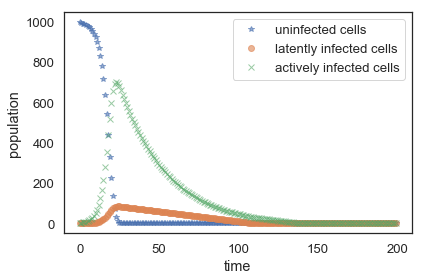

In [6]:
results = run_sim(1000,0,0,100,200,upd8_func,.1)
plot(results.uninfected, '*', label="uninfected cells")
plot(results.latently_infected, 'o', label="latently infected cells")
plot(results.actively_infected, 'x', label="actively infected cells")
#plot(results.free_virons, '+', label="free virons")
decorate(xlabel = "time", ylabel = "population")

This graph descrivbes the behaviors of the various types of cells.

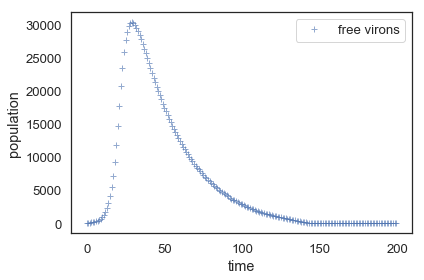

In [7]:
plot(results.free_virons, '+', label="free virons")
decorate(xlabel = "time", ylabel = "population")

This graph describes the bahavior of the free virons. This bahavior was much larger than that of the natural cells and so it was graphed seperately.These graphs mimic the bahavor shown in the model of the paper however some of the constants in this implementation are not exactly the same as those used in the paper so the precise values are different.